In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



PauliX = [[0, 1], [1, 0]]
PauliY = [[0, -1j], [-1j, 0]]
PauliZ = [[1, 0], [0, -1]]
Identity = [[1, 0], [0, 1]]

In [ ]:
def QuantumSolver(coef,diff,w):
  bina = []
  probability = []
  count = 0
  for i in coef:
    probability.append(i*i)
    bina.append(count)
    count += 1

  chosen = random.choices(bina, probability, k=1)
  sorted = [int(i) for i in str(bin(chosen[0]))[2:]]
  print(chosen)

  for i in range(len(w)-len(sorted)):
    sorted.insert(0,0)
  return sorted

In [ ]:
def TensorMultiplication(a, b):
  matrix = [[] for x in range(len(a)* len(b))]
  for i in range(len(a)):
    for x in a[i]:
      for n in range(len(b)):
        for y in b[n]:
            matrix[2*i+n].append(x*y)
  return matrix

In [ ]:
Zmatrix = 0
#weights = [45,35,10,10,10,10,10,10,10,10]
weights = [3,1,1,7,1,1]

for n in range(len(weights)):
  for i in range(len(weights)):
    if(i == 0):
      if n == 0:
        XX = weights[i]*np.array(PauliZ)
      else:
        XX = Identity
    else:
      if(i == n):
        XX = TensorMultiplication(XX, weights[i]*np.array(PauliZ))
      else:
        XX = TensorMultiplication(XX, Identity)
  if(Zmatrix == 0):
    Zmatrix = XX
  else:
    temp = [[] for i in range(len(XX))]
    for i in range(len(XX)):
      for n in range(len(XX[i])):
        temp[i].append(XX[i][n]+Zmatrix[i][n])
    Zmatrix = temp

In [ ]:
def normalize(arr):
  arrr = []
  for i in arr:
    arrr.append(i*i)
  s = sum(arrr)
  for i in range(len(arrr)):
    arr[i] = np.sqrt((1/s)*(arrr[i]))
  return arr

In [ ]:
#Time evolution operator
def TimeEvolve(L, A, t):
  a = []
  for i in range(len(A)):
    a.append(A[i]*np.exp(L[i]*t))
  return a

In [ ]:
def dissipation(diff, coef, t):
  A = TimeEvolve(diff, coef, t)

  p = []
  b = []
  psi1 = []
  for i in range(len(l)):
    b.insert(i, coef[i])
    p.insert(0, diff[i])

  B = TimeEvolve(p, b, t)
  prob = random.random()
  for i in range(len(coef)):
    if(prob > .5):
      psi1.append(A[i] + B[i])
    else:
      psi1.append(A[i] + B[i])
  return psi1

[14, 12, 12, 10, 0, -2, -2, -4, 12, 10, 10, 8, -2, -4, -4, -6, 12, 10, 10, 8, -2, -4, -4, -6, 10, 8, 8, 6, -4, -6, -6, -8, 8, 6, 6, 4, -6, -8, -8, -10, 6, 4, 4, 2, -8, -10, -10, -12, 6, 4, 4, 2, -8, -10, -10, -12, 4, 2, 2, 0, -10, -12, -12, -14]
24
[(8.301603284407323e-07+0j), (2.4465215460436567e-07+0j), (2.4465215460436567e-07+0j), (5.220651280997061e-06+0j), (0.7009716203491779+0j), (0.046472538397375265+0j), (0.046472538397375265+0j), (2.1064422195763867e-09+0j), (2.4465215460436567e-07+0j), (5.220651280997061e-06+0j), (5.220651280997061e-06+0j), (1.690953279131349e-09+0j), (0.046472538397375265+0j), (2.1064422195763867e-09+0j), (2.1064422195763867e-09+0j), (2.0307887098253264e-07+0j), (2.4465215460436567e-07+0j), (5.220651280997061e-06+0j), (5.220651280997061e-06+0j), (1.690953279131349e-09+0j), (0.046472538397375265+0j), (2.1064422195763867e-09+0j), (2.1064422195763867e-09+0j), (2.0307887098253264e-07+0j), (5.220651280997061e-06+0j), (1.690953279131349e-09+0j), (1.690953279131349

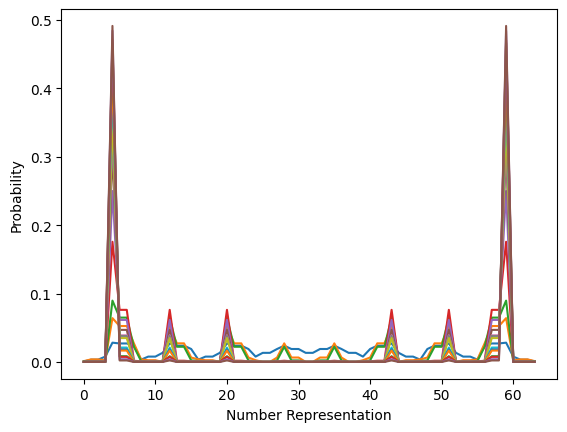

In [ ]:
import time
start_time = time.time()
dup = np.diag(Zmatrix).tolist()
g = .001
print(dup)
t = .41j

a = []
l = []
location = []
count = 0
while len(dup) > 0:
  l.append(dup[0])
  a.append(1)
  dup.pop(0)

a = normalize(a)
for i in range(16): #number of steps
  x = random.random()*t
  a = dissipation(l,a,x)
  a = normalize(a)
  b = []
  for i in a:
    b.append(i*i)
  plt.plot(b)

print(4*len(weights))
answer = []
for i in a:
  answer.append(i*i)
count = 0
for i in l:
  if (i == 0):
    count += 1
print(a)
print(count)

buckets = QuantumSolver(a,l,weights)
g1 = []
g2 = []
for i in range(len(buckets)):
  if buckets[i] == 0:
    g1.append(weights[i])
  else:
    g2.append(weights[i])

print(g1)
print(g2)
plt.ylabel("Probability")
plt.xlabel("Number Representation")
print(max(a))

print("--- %s seconds ---" % (time.time() - start_time))

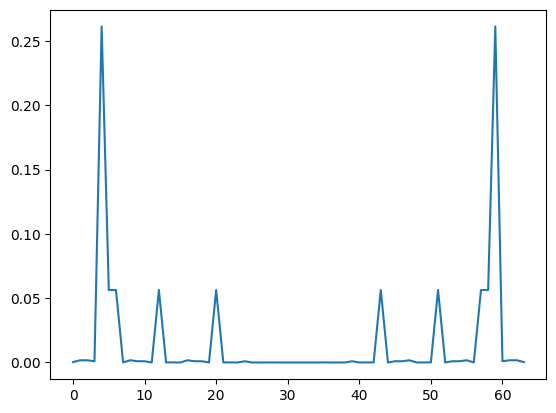

In [ ]:
plt.plot(b)

In [ ]:
np.binary_repr(23,6)

'010111'